In [2]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
import matplotlib.pyplot as plt
import numpy as np

In [3]:
X,y = make_blobs(n_samples=500,centers=5,random_state=8)

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=8)

In [5]:
nb = BernoulliNB()

In [6]:
nb.fit(X_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [7]:
print("伯努利训练数据集得分：{:.2f}".format(nb.score(X_train,y_train)))

伯努利训练数据集得分：0.50


In [9]:
def draw_pic(X,X_train,X_test,y_train,y_test,nb):
    x_min,x_max = X[:,0].min()-0.5,X[:,0].max()+0.5
    y_min,y_max = X[:,1].min()-0.5,X[:,1].max()+0.5
    xx,yy = np.meshgrid(np.arange(x_min,x_max,.02),np.arange(y_min,y_max,.02))
    z = nb.predict(np.c_[xx.ravel(),yy.ravel()])
    z = z.reshape(xx.shape)
    plt.pcolormesh(xx,yy,z,cmap=plt.cm.Pastel1)
    plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=plt.cm.spring,edgecolor='k')
    plt.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=plt.cm.cool,marker='*',edgecolor='k')
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    plt.title("KNN-5")
    plt.show()

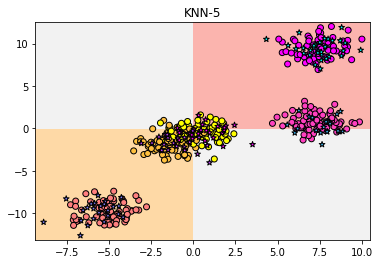

In [10]:
draw_pic(X,X_train,X_test,y_train,y_test,nb)

In [11]:
from sklearn.naive_bayes import GaussianNB

In [12]:
gnb = GaussianNB().fit(X_train,y_train)

In [13]:
print("高斯训练数据集得分：{:.3f}".format(gnb.score(X_train,y_train)))

高斯训练数据集得分：0.939


In [14]:
from sklearn.naive_bayes import MultinomialNB
#数据预处理
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
#只能处理非负的
mnb = MultinomialNB().fit(X_train_scaled,y_train)

In [16]:
print("多项式训练数据集得分：{:.3f}".format(mnb.score(X_train_scaled,y_train)))

多项式训练数据集得分：0.397


In [19]:
#肿瘤数据集
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [20]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [21]:
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target)

In [22]:
gnb.fit(X_train,y_train)

GaussianNB(priors=None)

In [23]:
print("高斯训练数据集得分：{:.3f}".format(gnb.score(X_train,y_train)))
print("高斯测试数据集得分：{:.3f}".format(gnb.score(X_test,y_test)))

高斯训练数据集得分：0.941
高斯测试数据集得分：0.937


In [24]:
#学习曲线
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [25]:
def plot_learning_curve(estimator,title,X,y,ylim=None,cv=None,n_jobs=1,train_sizes=np.linspace(0.1,1.0,5)):
    #创建图形实例
    plt.figure()
    plt.title(title)
    #if ylim is not None:
    #    plt.show(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes,train_scores,test_scores=learning_curve(estimator,X,y,cv=cv,n_jobs=n_jobs,train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores,axis=1)
    test_scores_mean = np.mean(test_scores,axis=1)
    plt.grid()
    plt.plot(train_sizes,train_scores_mean,'o-',color='r',label="Train Score")
    plt.plot(train_sizes,test_scores_mean,'*-',color='g',label="Cross Validation Score")
    plt.legend(loc='lower right')
    return plt

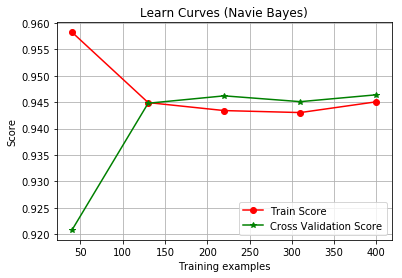

In [26]:
titie = "Learn Curves (Navie Bayes)"
cv = ShuffleSplit(n_splits=100,test_size=0.2,random_state=0)
estimator = GaussianNB()
plot_learning_curve(estimator,titie,X,y,ylim=(0.9,1.01),cv=cv,n_jobs=4)
plt.show()

### 总结

- 贝努力朴素贝叶斯适合二项式分布的数据集
- 多项式朴素贝叶斯适合非负、离散的数据集（文本）
- 高斯朴素贝叶斯适用面更广